# <u><b><h1>Analysis Sentiment<h1></b></u>

### Data Cleaning

In [55]:

# Data Cleaning
import pandas as pd
import re

data = pd.read_csv('imdb_comments.csv')

data['Commentaire'] = data['Commentaire'].apply(lambda x: re.sub('<.*?>', '', x))

data['Commentaire'] = data['Commentaire'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

data['Commentaire'] = data['Commentaire'].str.lower()

data['Commentaire'] = data['Commentaire'].apply(lambda x: ' '.join(x.split()))

print(data.head())

data.describe()
data.isna().sum()


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Salma Fannich\AppData\Local\Temp\ipykernel_15048\846289226.py:12: SyntaxWarning: invalid escape sequence '\s'
  data['Commentaire'] = data['Commentaire'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))


          Film                                        Commentaire sentiment
0  Oppenheimer  youll have to have your wits about you and you...   positif
1  Oppenheimer  one of the most anticipated films of the year ...   positif
2  Oppenheimer  but in many ways i cant deny it was an excepti...   positif
3  Oppenheimer  the films at its best when it focuses on being...   positif
4  Oppenheimer  i did really feel the length in the final hour...   positif


Film           0
Commentaire    0
sentiment      0
dtype: int64

### Informations about our data 


In [58]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22276 entries, 0 to 22275
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Film         22276 non-null  object
 1   Commentaire  22276 non-null  object
 2   sentiment    22276 non-null  object
dtypes: object(3)
memory usage: 522.2+ KB


### Verification of null values 

In [59]:
print(data.isnull().values.any())

False


### Duplicated data verification

In [60]:
data.duplicated().any()

True

### Deleting the duplicated data 

In [61]:
data = data.drop_duplicates()
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 21378 entries, 0 to 22275
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Film         21378 non-null  object
 1   Commentaire  21378 non-null  object
 2   sentiment    21378 non-null  object
dtypes: object(3)
memory usage: 668.1+ KB
None


### Adding a colone for sentiments of reviews based on Textblob

In [62]:
from textblob import TextBlob
import pandas as pd

imdb_comments = pd.read_csv('imdb_comments.csv')

# Définir une fonction pour étiqueter le sentiment 
def etiqueter_sentiment(Commentaire):
    analysis = TextBlob(Commentaire)
    sentiment = analysis.sentiment.polarity

    if sentiment > 0:
        return "positif"
    elif sentiment < 0:
        return "négatif"
    else:
        return "neutre"

imdb_comments['sentiment'] = imdb_comments['Commentaire'].apply(etiqueter_sentiment)
print(imdb_comments[['Commentaire', 'sentiment']].head())


                                         Commentaire sentiment
0  You'll have to have your wits about you and yo...   positif
1  One of the most anticipated films of the year ...   positif
2  But in many ways, I can't deny it was an excep...   positif
3  The film's at its best when it focuses on bein...   positif
4  I did really feel the length in the final hour...   positif


### visualisation to know numbers of each class 

<Axes: ylabel='count'>

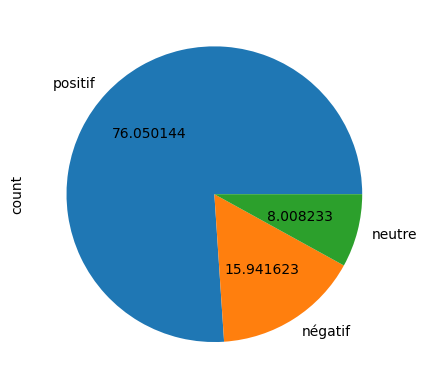

In [63]:
data['sentiment'].value_counts().plot.pie(autopct='%2f')

### Numbers of reviews of each class


In [64]:
class_distribution = imdb_comments['sentiment'].value_counts()
print(class_distribution)


sentiment
positif    16957
négatif     3510
neutre      1809
Name: count, dtype: int64


### Plot of most words using in positive

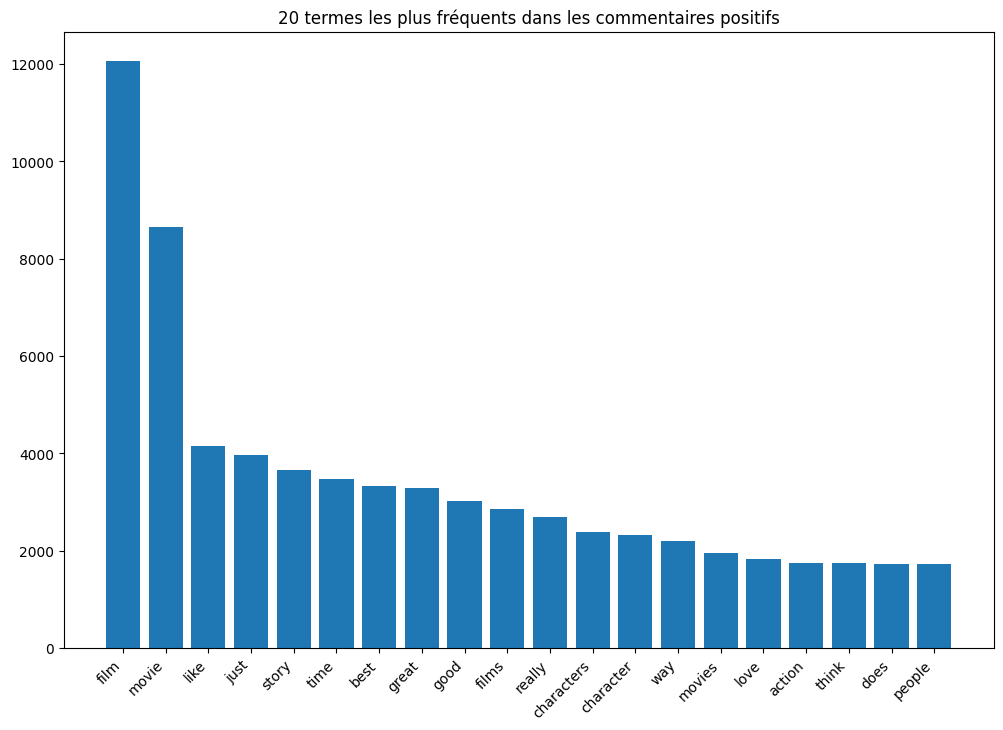

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

positive_comments = data[data['sentiment'] == 'positif']['Commentaire']

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(positive_comments)

word_counts = X.sum(axis=0)

# Triez les mots par fréquence
word_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq.sort(key=lambda x: x[1], reverse=True)

# Séparez les mots et les fréquences
words, frequencies = zip(*word_freq)
plt.figure(figsize=(12, 8))
plt.bar(range(20), frequencies[:20], tick_label=words[:20])
plt.xticks(rotation=45, ha='right')
plt.title('20 termes les plus fréquents dans les commentaires positifs')
plt.show()



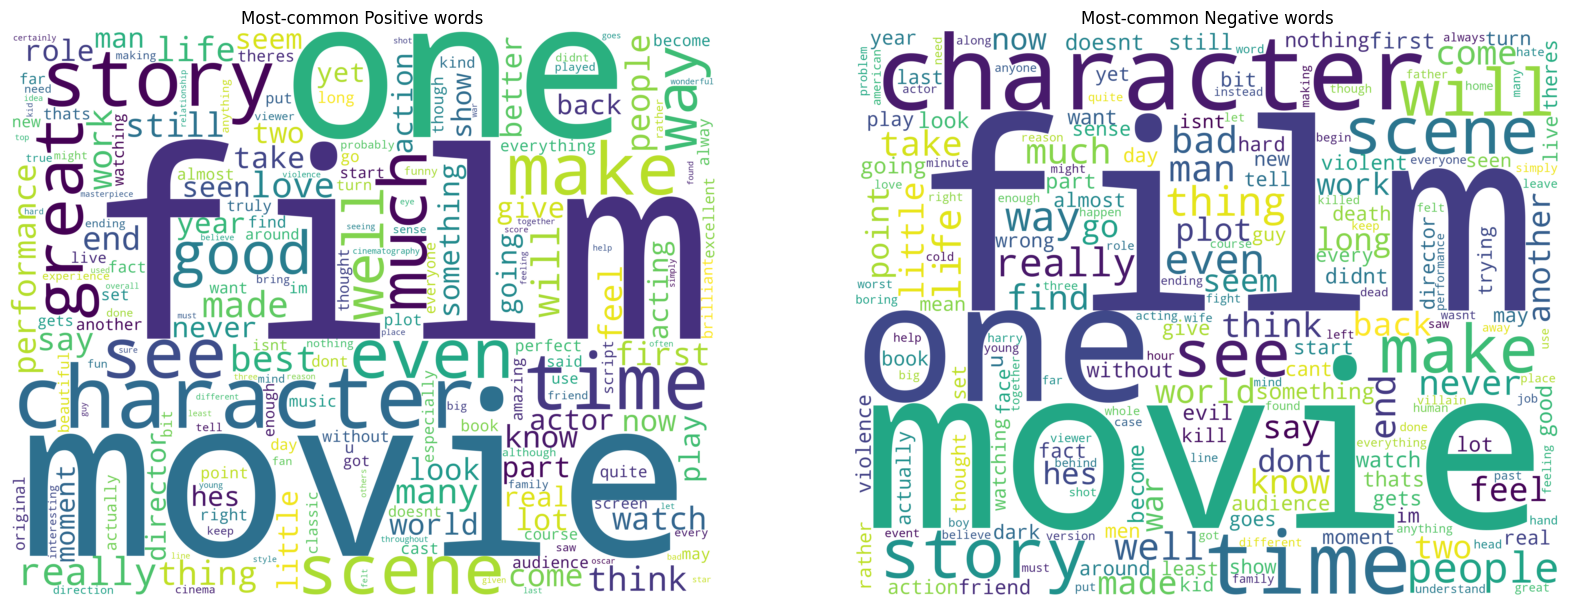

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

positivedata = data[data['sentiment'] == 'positif']['Commentaire']
negdata = data[data['sentiment'] == 'négatif']['Commentaire']

# Function to generate a word cloud
def wordcloud_draw(data, color, title):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color=color, width=2500, height=2000).generate(cleaned_word)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=[20, 10])
plt.subplot(1, 2, 1)
wordcloud_draw(positivedata, 'white', 'Most-common Positive words')

plt.subplot(1, 2, 2)
wordcloud_draw(negdata, 'white', 'Most-common Negative words')
plt.show()


### Most words using in negatives reviews 

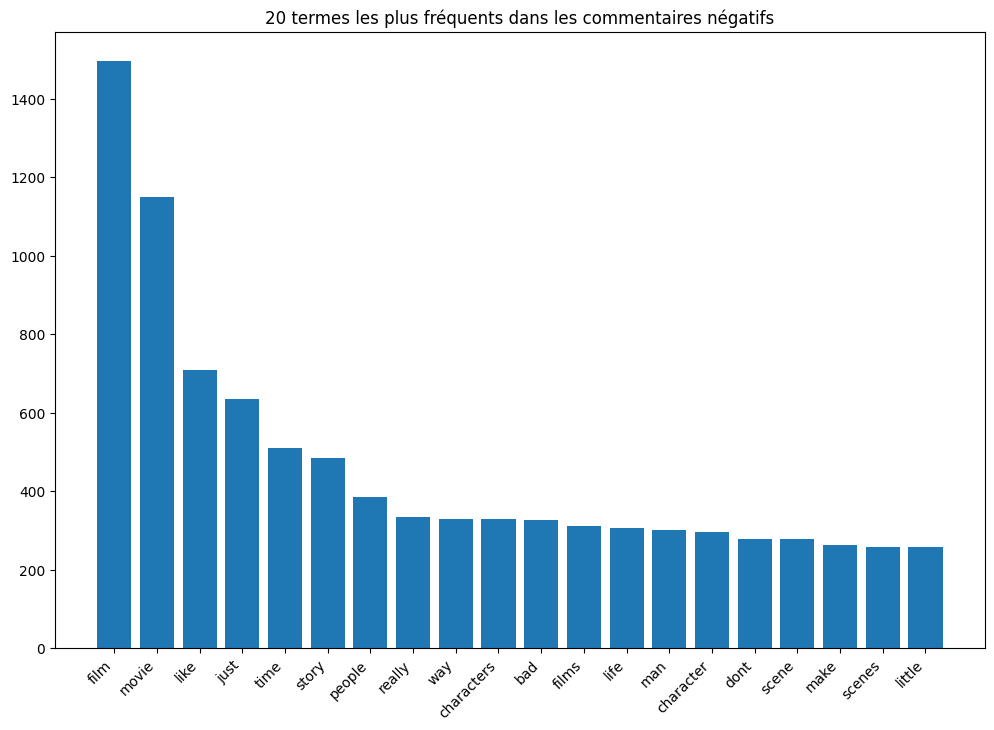

In [13]:

negative_comments = data[data['sentiment'] == 'négatif']['Commentaire']

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(negative_comments)

word_counts = X.sum(axis=0)

word_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq.sort(key=lambda x: x[1], reverse=True)

words, frequencies = zip(*word_freq)

plt.figure(figsize=(12, 8))
plt.bar(range(20), frequencies[:20], tick_label=words[:20])
plt.xticks(rotation=45, ha='right')
plt.title('20 termes les plus fréquents dans les commentaires négatifs')
plt.show()

### Testing to find the best balancing of dataset with testing the models 

Accuracy sur l'ensemble de test: 0.8479724674547359


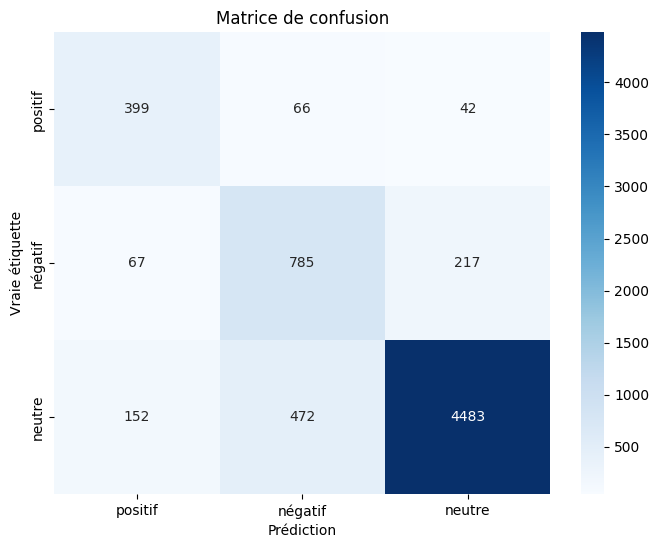

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.65      0.79      0.71       507
     négatif       0.59      0.73      0.66      1069
     positif       0.95      0.88      0.91      5107

    accuracy                           0.85      6683
   macro avg       0.73      0.80      0.76      6683
weighted avg       0.87      0.85      0.85      6683



In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


#  une fonction pour équilibrer les données et entraîner un modèle
def train_and_evaluate_model(data, target_col):
   
    X = data['Commentaire']
    y = data[target_col]

 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    tfidf_vectorizer = TfidfVectorizer()
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Définissez les taux de suréchantillonnage et de sous-échantillonnage
    sampling_strategy_over = {
        'positif': 11850,
        'négatif': 9000,
        'neutre': 9000
    }
    sampling_strategy_under = {
        'positif': 7500,
        'négatif': 7000,
        'neutre': 6500
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    pipeline = Pipeline([
        ('model', LogisticRegression(random_state=42, max_iter=1000))
    ])

 
    pipeline.fit(X_balanced, y_balanced)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


imdb_comments = pd.read_csv('imdb_comments.csv')

train_and_evaluate_model(imdb_comments, 'sentiment')

# Implementation models with TfIDFVectorizer

### Model SVM (linear) with good balancing 

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.849618434834655


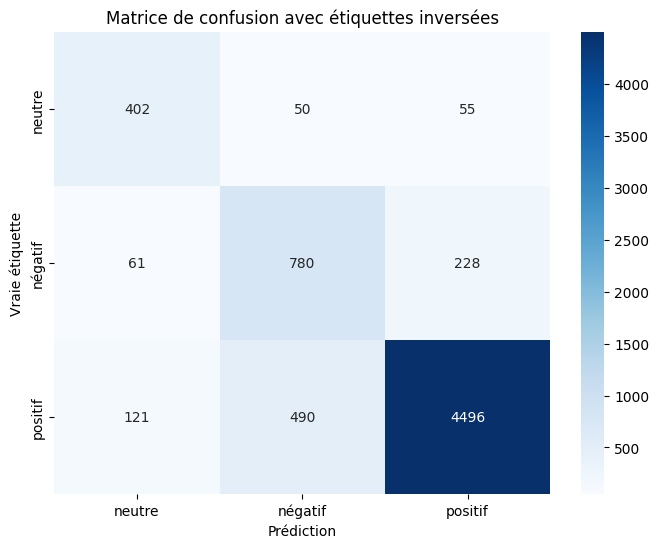

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.69      0.79      0.74       507
     négatif       0.59      0.73      0.65      1069
     positif       0.94      0.88      0.91      5107

    accuracy                           0.85      6683
   macro avg       0.74      0.80      0.77      6683
weighted avg       0.87      0.85      0.86      6683

Phrase : 'This movie is amazing!' => Prédiction de sentiment : Positive
Phrase : 'I didn't like the plot of the film.' => Prédiction de sentiment : Negative
Phrase : 'Neutral comment about the movie.' => Prédiction de sentiment : Neutral


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC 
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', SVC(kernel='linear', random_state=42))  # SVC
])

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
  
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

   
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

   
    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }
    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)
    
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())
  
    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)
# Test des nouvelles phrases
new_phrases = [
    "This movie is amazing!",
    "I didn't like the plot of the film.",
    "Neutral comment about the movie."
]


new_phrases_tfidf = tfidf_vectorizer.transform(new_phrases)

predicted_sentiments = pipeline.predict(new_phrases_tfidf)

for phrase, sentiment in zip(new_phrases, predicted_sentiments):
    print(f"Phrase : '{phrase}' => Prédiction de sentiment : {'Positive' if sentiment == 'positif' else 'Negative' if sentiment == 'négatif' else 'Neutral'}")

### SVM linear with C=10.0

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8511147688163998


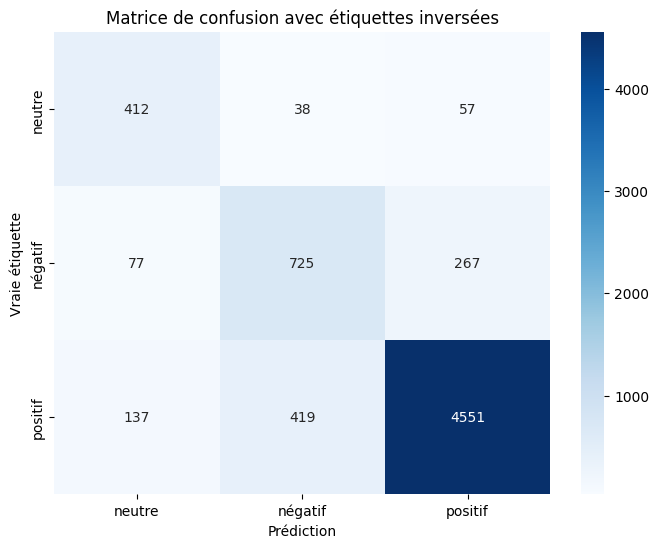

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.66      0.81      0.73       507
     négatif       0.61      0.68      0.64      1069
     positif       0.93      0.89      0.91      5107

    accuracy                           0.85      6683
   macro avg       0.74      0.79      0.76      6683
weighted avg       0.86      0.85      0.86      6683

Phrase : 'This movie is amazing!' => Prédiction de sentiment : Positive
Phrase : 'I didn't like the plot of the film.' => Prédiction de sentiment : Negative
Phrase : 'Neutral comment about the movie.' => Prédiction de sentiment : Neutral


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC  
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', SVC(kernel='linear',C=10.0, random_state=42))  # SVC
])

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
    
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)


    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }


    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

   
    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)
  
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }
  
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())
    

    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)

new_phrases = [
    "This movie is amazing!",
    "I didn't like the plot of the film.",
    "Neutral comment about the movie."
]

new_phrases_tfidf = tfidf_vectorizer.transform(new_phrases)

predicted_sentiments = pipeline.predict(new_phrases_tfidf)

for phrase, sentiment in zip(new_phrases, predicted_sentiments):
    print(f"Phrase : '{phrase}' => Prédiction de sentiment : {'Positive' if sentiment == 'positif' else 'Negative' if sentiment == 'négatif' else 'Neutral'}")

### SVM model testing wtih different perametres to choose the best one 

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Meilleurs paramètres trouvés par la recherche par grille: {'model__C': 10.0, 'model__kernel': 'rbf'}
Accuracy sur l'ensemble de test: 0.8701182103845578


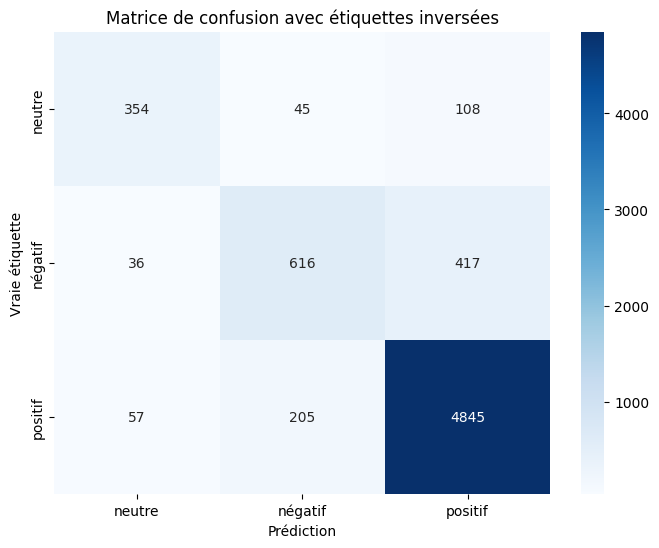

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.79      0.70      0.74       507
     négatif       0.71      0.58      0.64      1069
     positif       0.90      0.95      0.92      5107

    accuracy                           0.87      6683
   macro avg       0.80      0.74      0.77      6683
weighted avg       0.86      0.87      0.86      6683



NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC 
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', SVC(kernel='linear', random_state=42))  
])


def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
    
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

   
    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }
   
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    # Définir les paramètres à tester
    param_grid = {
        'model__C': [0.1, 1.0,10.0],  # Valeurs possibles pour le paramètre C
        'model__kernel': ['linear', 'rbf']  # Différents types de noyaux
    }

   
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

    grid_search.fit(X_balanced, y_balanced)

   
    best_params = grid_search.best_params_
    print("Meilleurs paramètres trouvés par la recherche par grille:", best_params)

    y_pred = grid_search.predict(X_test_tfidf)


    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())
 
    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()


    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)
# Test des nouvelles phrases
new_phrases = [
    "This movie is amazing!",
    "I didn't like the plot of the film.",
    "Neutral comment about the movie."
]

# Vectoriser les nouvelles phrases
new_phrases_tfidf = tfidf_vectorizer.transform(new_phrases)

predicted_sentiments = pipeline.predict(new_phrases_tfidf)

# Affichage des prédictions de sentiment pour les nouvelles phrases
for phrase, sentiment in zip(new_phrases, predicted_sentiments):
    print(f"Phrase : '{phrase}' => Prédiction de sentiment : {'Positive' if sentiment == 'positif' else 'Negative' if sentiment == 'négatif' else 'Neutral'}")

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8701182103845578


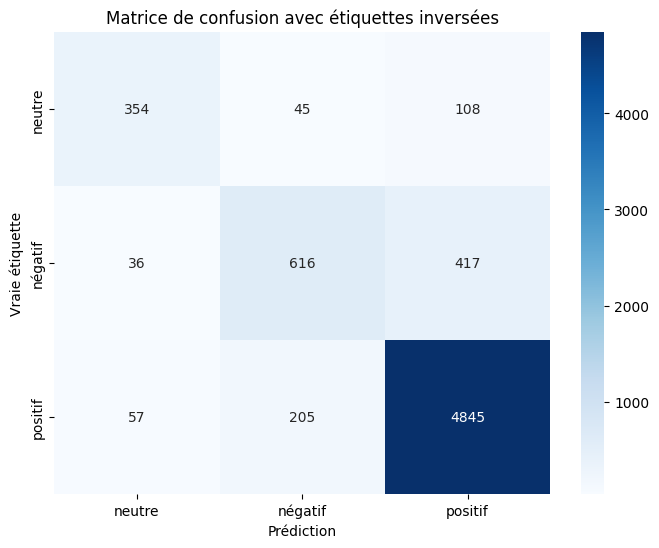

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.79      0.70      0.74       507
     négatif       0.71      0.58      0.64      1069
     positif       0.90      0.95      0.92      5107

    accuracy                           0.87      6683
   macro avg       0.80      0.74      0.77      6683
weighted avg       0.86      0.87      0.86      6683

Phrase : 'This movie is amazing!' => Prédiction de sentiment : Positive
Phrase : 'I didn't like the plot of the film.' => Prédiction de sentiment : Negative
Phrase : 'Neutral comment about the movie.' => Prédiction de sentiment : Neutral


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC  
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', SVC(kernel='rbf',C=10.0, random_state=42)) 
])

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())
 
    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

imdb_comments = pd.read_csv('imdb_comments.csv')

# taux de suréchantillonnage et de sous-échantillonnage
over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)
new_phrases = [
    "This movie is amazing!",
    "I didn't like the plot of the film.",
    "Neutral comment about the movie."
]

# Vectoriser les nouvelles phrases
new_phrases_tfidf = tfidf_vectorizer.transform(new_phrases)

predicted_sentiments = pipeline.predict(new_phrases_tfidf)

for phrase, sentiment in zip(new_phrases, predicted_sentiments):
    print(f"Phrase : '{phrase}' => Prédiction de sentiment : {'Positive' if sentiment == 'positif' else 'Negative' if sentiment == 'négatif' else 'Neutral'}")

### => we conclude the best model is svm with 'rbf' kernel and C=10.0

### Simple Logisitic Regression with balancing

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8386951967679186


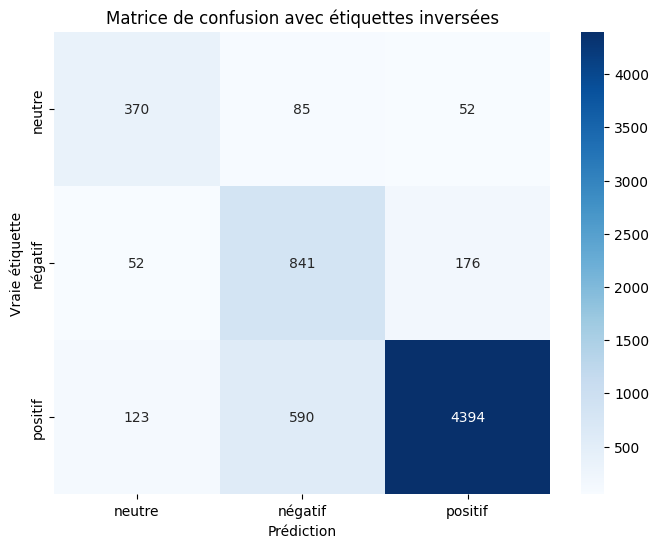

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.68      0.73      0.70       507
     négatif       0.55      0.79      0.65      1069
     positif       0.95      0.86      0.90      5107

    accuracy                           0.84      6683
   macro avg       0.73      0.79      0.75      6683
weighted avg       0.87      0.84      0.85      6683



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', LogisticRegression(random_state=42, max_iter=1000)) 
])


def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
   
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")
    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())
  
    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


### Logitic regression with C=10.0 and penality=l2

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8585964387251235


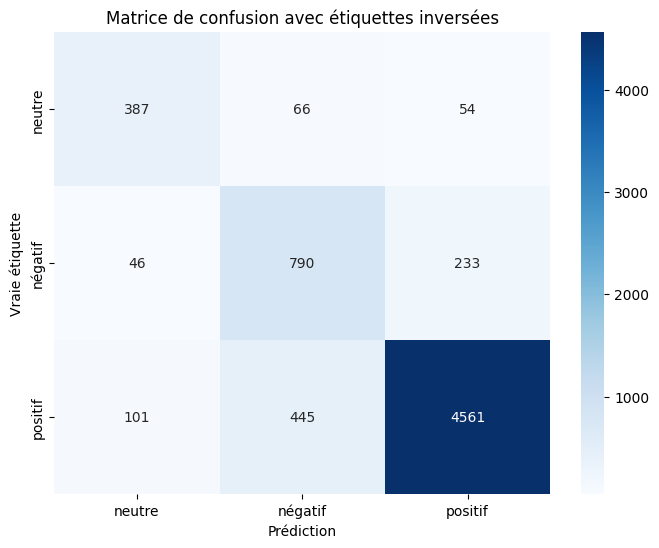

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.72      0.76      0.74       507
     négatif       0.61      0.74      0.67      1069
     positif       0.94      0.89      0.92      5107

    accuracy                           0.86      6683
   macro avg       0.76      0.80      0.78      6683
weighted avg       0.87      0.86      0.86      6683



In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', LogisticRegression(random_state=42, max_iter=1000, C=10.0, penalty='l2'))  # Logistic Regression
])

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
    
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)


    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

 
    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)
    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)


    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())##

    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


### Logistic regression with penality='l1'

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy sur l'ensemble de test: 0.8680233428101152


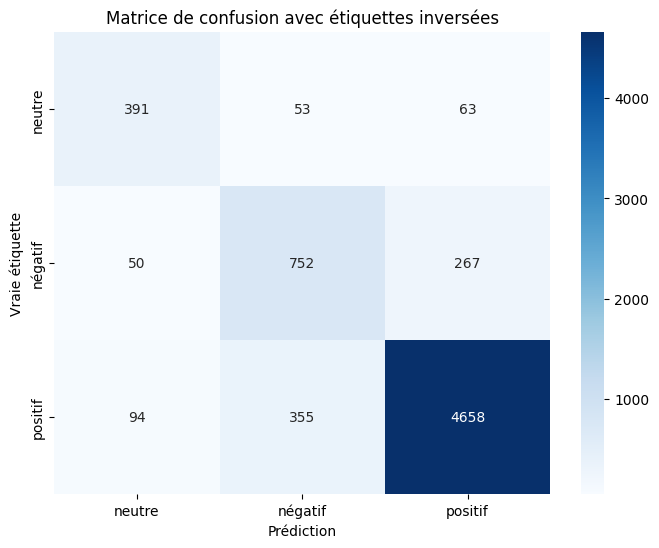

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.73      0.77      0.75       507
     négatif       0.65      0.70      0.67      1069
     positif       0.93      0.91      0.92      5107

    accuracy                           0.87      6683
   macro avg       0.77      0.80      0.78      6683
weighted avg       0.87      0.87      0.87      6683



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()


pipeline = Pipeline([
    ('model', LogisticRegression(random_state=42, max_iter=1000, C=10.0, penalty='none')) 
])

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
  
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)


    class_distribution_after_sampling = Counter(y_balanced)


    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())
    
    labels_reversed = list(reversed(labels))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

  
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

imdb_comments = pd.read_csv('imdb_comments.csv')


over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


### Logistic regression adding class_weight balanced but it gives same result 

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8560526709561574


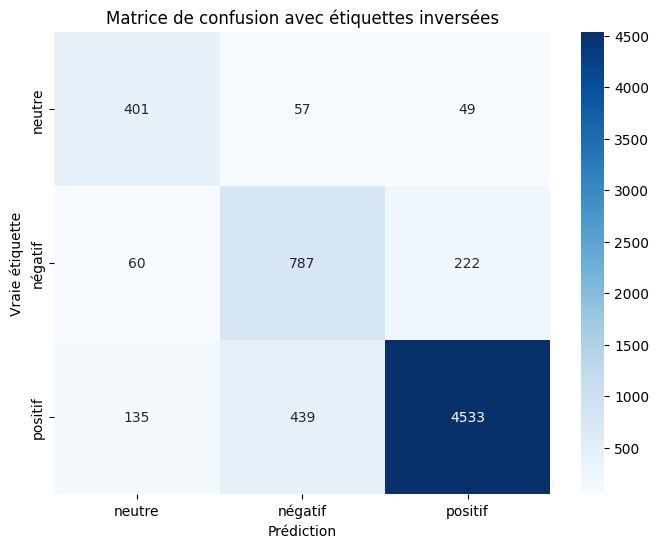

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.67      0.79      0.73       507
     négatif       0.61      0.74      0.67      1069
     positif       0.94      0.89      0.91      5107

    accuracy                           0.86      6683
   macro avg       0.74      0.80      0.77      6683
weighted avg       0.87      0.86      0.86      6683



In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', LogisticRegression(random_state=42, max_iter=1000, C=10.0, penalty='l2' , class_weight='balanced'))  # Logistic Regression
])


def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):

    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

  
    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)
    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }
   
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)
    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())
 
    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


### Logistic Regression with solver =' newton-cholesky' penality none

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', LogisticRegression(random_state=42, max_iter=1000 , solver='newton-cholesky' , penalty='none'))  # Logistic Regression
])

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):

    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)


    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    # Vérifiez si l'ensemble d'entraînement après le suréchantillonnage est vide
    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }
  
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())
    
    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(


### Logistic Regression with dual=False, fit_intercept=True

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8386951967679186


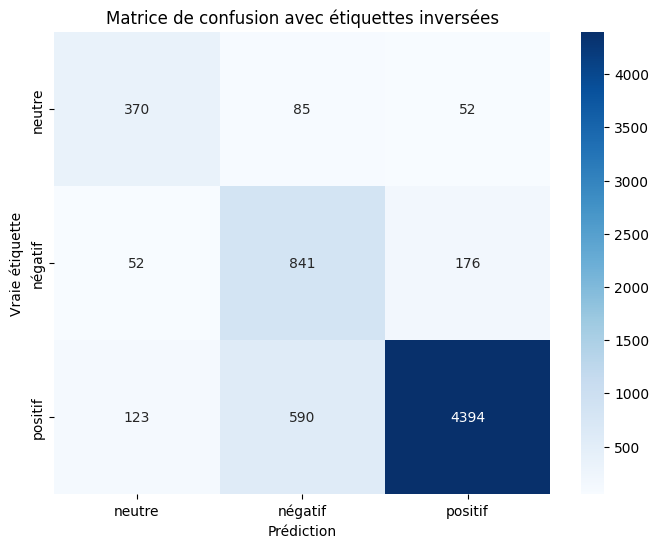

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.68      0.73      0.70       507
     négatif       0.55      0.79      0.65      1069
     positif       0.95      0.86      0.90      5107

    accuracy                           0.84      6683
   macro avg       0.73      0.79      0.75      6683
weighted avg       0.87      0.84      0.85      6683



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', LogisticRegression(random_state=42, max_iter=1000 , dual=False, fit_intercept=True)) 
])

# Définir une fonction pour équilibrer les données et entraîner un modèle
def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
  
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())
    
    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()


    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


### Logitic Regression with solver='liblinear'

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8280712254975311


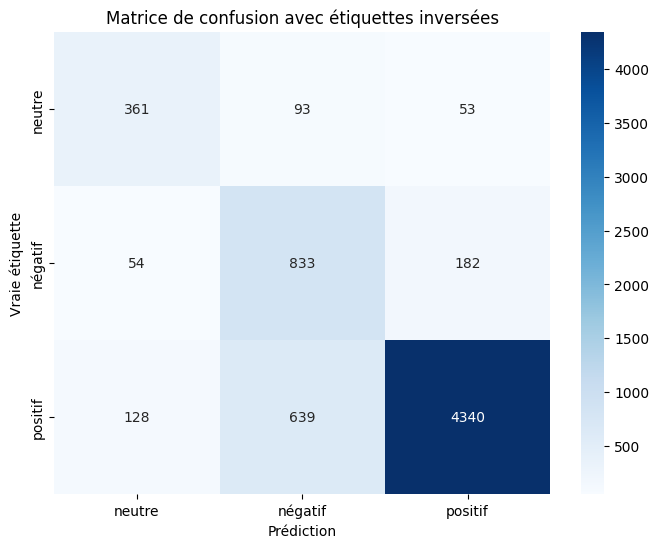

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.66      0.71      0.69       507
     négatif       0.53      0.78      0.63      1069
     positif       0.95      0.85      0.90      5107

    accuracy                           0.83      6683
   macro avg       0.72      0.78      0.74      6683
weighted avg       0.86      0.83      0.84      6683



In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

# Créez un objet Pipeline en dehors de la fonction
pipeline = Pipeline([
    ('model', LogisticRegression(random_state=42, max_iter=1000 , solver='liblinear')) 
])


def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
   
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)


    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

 
    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

 
    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }
 
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

   
    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

  
    labels = list(y.unique())
 
    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


### Logitic Regression with solver='sag'

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8386951967679186


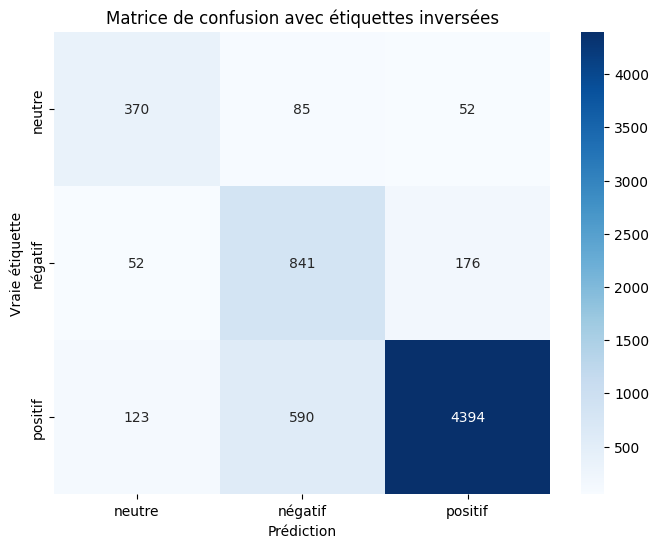

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.68      0.73      0.70       507
     négatif       0.55      0.79      0.65      1069
     positif       0.95      0.86      0.90      5107

    accuracy                           0.84      6683
   macro avg       0.73      0.79      0.75      6683
weighted avg       0.87      0.84      0.85      6683



In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', LogisticRegression(random_state=42, max_iter=1000 , solver='sag')) 
])

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
   
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

   
    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

  
    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())
    
    
    labels_reversed = list(reversed(labels))

    # Affichez la matrice de confusion avec les étiquettes inversées
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


## naive bayes 

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.7988927128535089


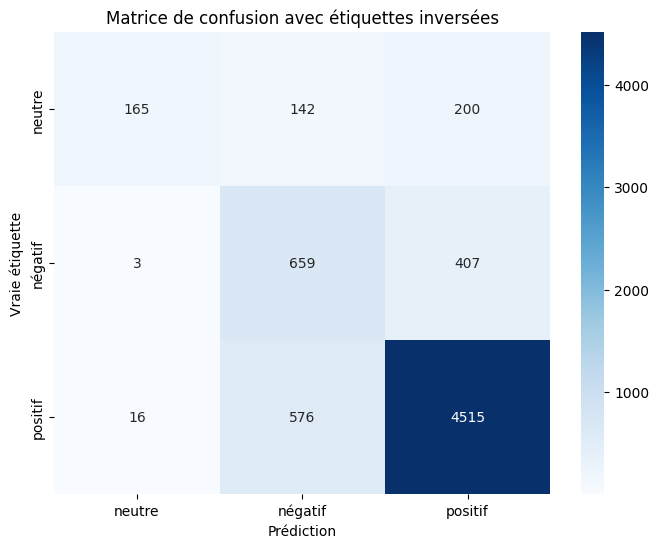

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.90      0.33      0.48       507
     négatif       0.48      0.62      0.54      1069
     positif       0.88      0.88      0.88      5107

    accuracy                           0.80      6683
   macro avg       0.75      0.61      0.63      6683
weighted avg       0.82      0.80      0.80      6683



In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB  
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()


pipeline = Pipeline([
    ('model', MultinomialNB()) 
])


def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
   
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }


    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

 
    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")


    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)


    confusion = confusion_matrix(y_test, y_pred)

 
    labels = list(y.unique())
    
 
    labels_reversed = list(reversed(labels))

 
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()


    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


### know the stopwords 

In [40]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])
print(list(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Naive bayes with differents alpha and know the best one is alpha =10


Entraînement avec alpha = 1e-05:
Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


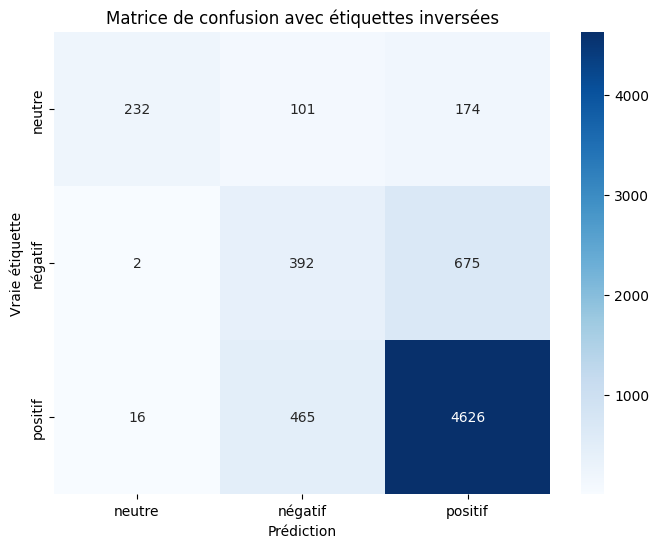

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.93      0.46      0.61       507
     négatif       0.41      0.37      0.39      1069
     positif       0.84      0.91      0.87      5107

    accuracy                           0.79      6683
   macro avg       0.73      0.58      0.62      6683
weighted avg       0.78      0.79      0.78      6683


Entraînement avec alpha = 0.0001:
Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


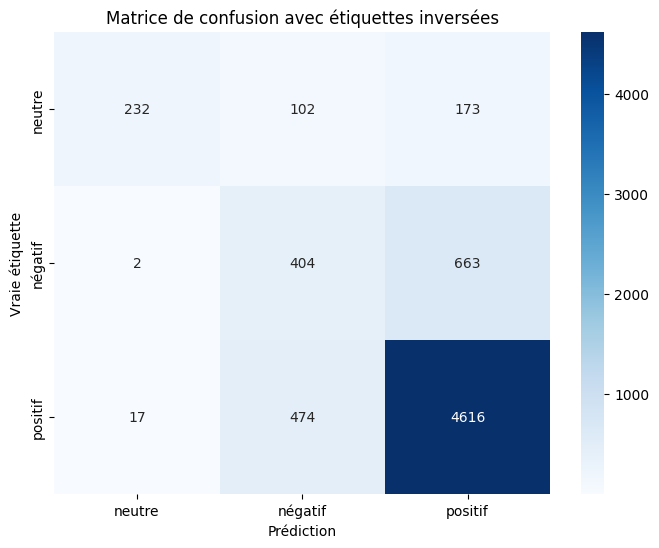

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.92      0.46      0.61       507
     négatif       0.41      0.38      0.39      1069
     positif       0.85      0.90      0.87      5107

    accuracy                           0.79      6683
   macro avg       0.73      0.58      0.63      6683
weighted avg       0.78      0.79      0.78      6683


Entraînement avec alpha = 0.001:
Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


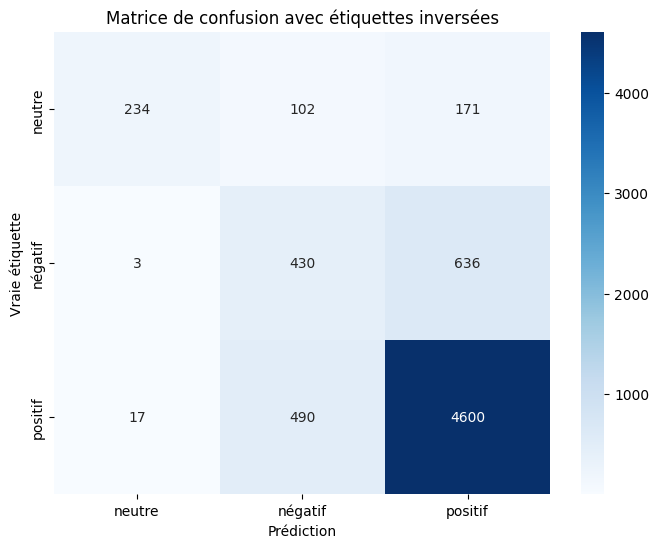

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.92      0.46      0.61       507
     négatif       0.42      0.40      0.41      1069
     positif       0.85      0.90      0.88      5107

    accuracy                           0.79      6683
   macro avg       0.73      0.59      0.63      6683
weighted avg       0.79      0.79      0.78      6683


Entraînement avec alpha = 0.1:
Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


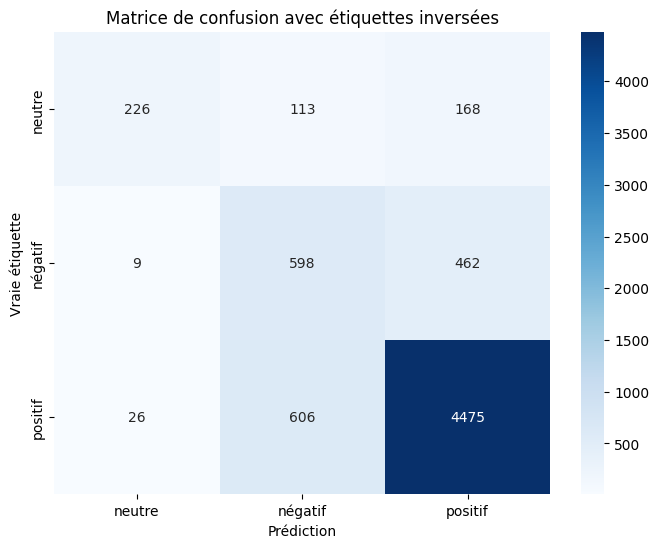

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.87      0.45      0.59       507
     négatif       0.45      0.56      0.50      1069
     positif       0.88      0.88      0.88      5107

    accuracy                           0.79      6683
   macro avg       0.73      0.63      0.66      6683
weighted avg       0.81      0.79      0.79      6683


Entraînement avec alpha = 1:
Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


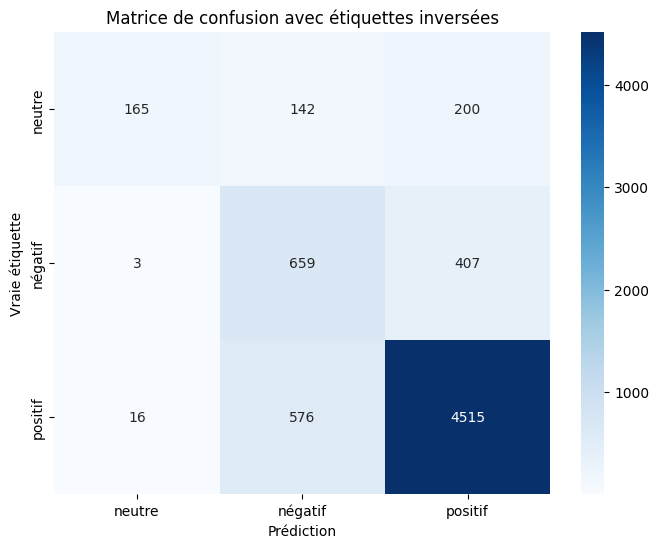

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.90      0.33      0.48       507
     négatif       0.48      0.62      0.54      1069
     positif       0.88      0.88      0.88      5107

    accuracy                           0.80      6683
   macro avg       0.75      0.61      0.63      6683
weighted avg       0.82      0.80      0.80      6683


Entraînement avec alpha = 10:
Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


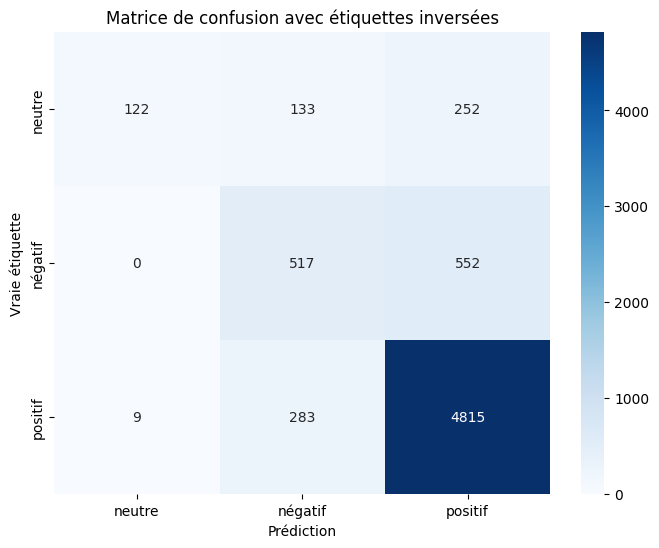

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.93      0.24      0.38       507
     négatif       0.55      0.48      0.52      1069
     positif       0.86      0.94      0.90      5107

    accuracy                           0.82      6683
   macro avg       0.78      0.56      0.60      6683
weighted avg       0.81      0.82      0.80      6683


Entraînement avec alpha = 100:
Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


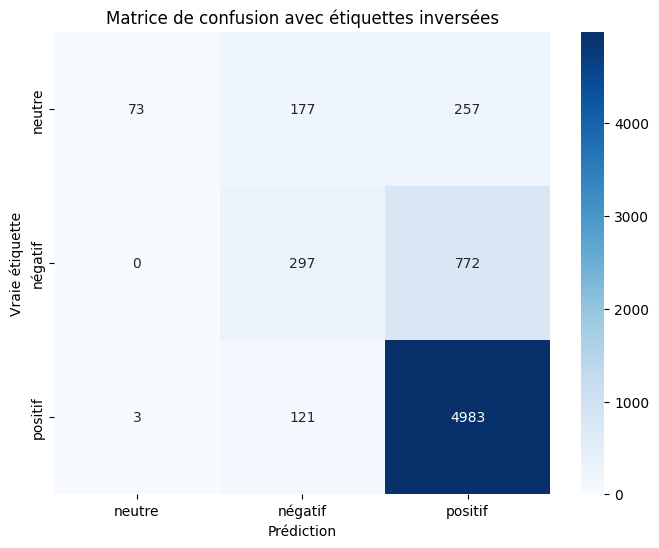

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.96      0.14      0.25       507
     négatif       0.50      0.28      0.36      1069
     positif       0.83      0.98      0.90      5107

    accuracy                           0.80      6683
   macro avg       0.76      0.47      0.50      6683
weighted avg       0.79      0.80      0.76      6683


Entraînement avec alpha = 1000:
Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


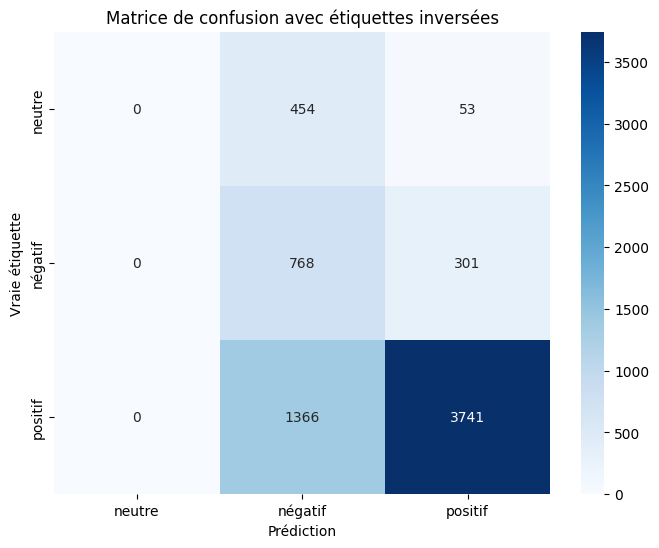

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.00      0.00      0.00       507
     négatif       0.30      0.72      0.42      1069
     positif       0.91      0.73      0.81      5107

    accuracy                           0.67      6683
   macro avg       0.40      0.48      0.41      6683
weighted avg       0.75      0.67      0.69      6683


Meilleur alpha trouvé: 10 avec une précision de 0.8161005536435733


C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from collections import Counter


tfidf_vectorizer = TfidfVectorizer()

alphas = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]


best_alpha = None
best_accuracy = 0

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate, alpha):
    global best_alpha, best_accuracy


    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)


    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }


    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    model = MultinomialNB(alpha=alpha)
    model.fit(X_balanced, y_balanced)

    y_pred = model.predict(X_test_tfidf)

   
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

    confusion = confusion_matrix(y_test, y_pred)

  
    labels = list(y.unique())
    
    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    # Affichez le rapport de classification
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


imdb_comments = pd.read_csv('imdb_comments.csv')

# Expérimentez avec différents taux de suréchantillonnage et de sous-échantillonnage
over_sampling_rate = 2.5
under_sampling_rate = 0.5

# Testez différents alphas
for alpha in alphas:
    print(f"\nEntraînement avec alpha = {alpha}:")
    train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate, alpha)

# Affichez le meilleur alpha trouvé
print(f"\nMeilleur alpha trouvé: {best_alpha} avec une précision de {best_accuracy}")


### Random Forest model

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8216369893760287


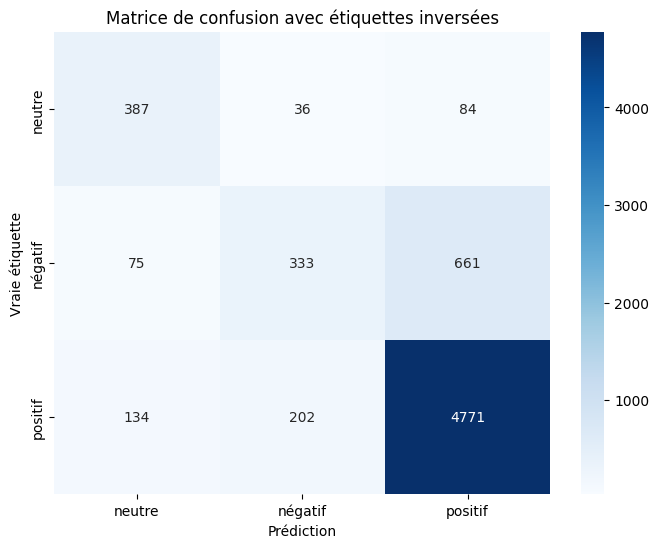

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.65      0.76      0.70       507
     négatif       0.58      0.31      0.41      1069
     positif       0.86      0.93      0.90      5107

    accuracy                           0.82      6683
   macro avg       0.70      0.67      0.67      6683
weighted avg       0.80      0.82      0.80      6683



In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 


tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', RandomForestClassifier(random_state=42)) 
])

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
  
    X = data['Commentaire']
    y = data[target_col]

  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

 
    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }


    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)


    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }


    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())

    labels_reversed = list(reversed(labels))

   
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

imdb_comments = pd.read_csv('imdb_comments.csv')


over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


### Random Forest avec best parametres 

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8240311237468203


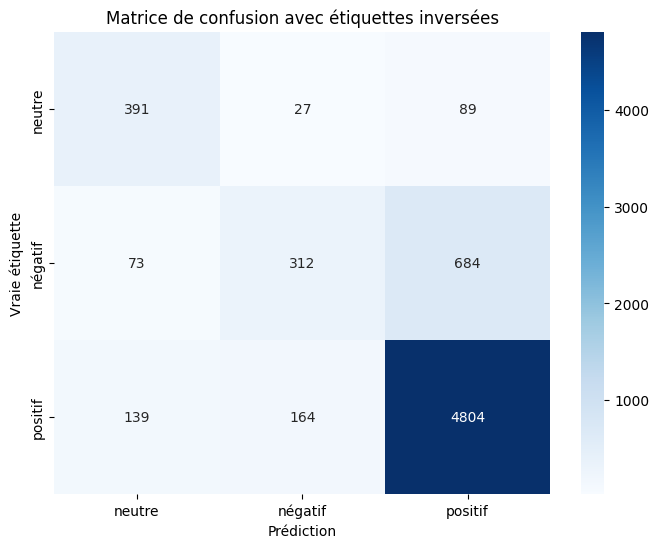

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.65      0.77      0.70       507
     négatif       0.62      0.29      0.40      1069
     positif       0.86      0.94      0.90      5107

    accuracy                           0.82      6683
   macro avg       0.71      0.67      0.67      6683
weighted avg       0.81      0.82      0.80      6683



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from collections import Counter


tfidf_vectorizer = TfidfVectorizer()

rf_classifier = RandomForestClassifier(random_state=42, max_depth=None, n_estimators=200)

pipeline = Pipeline([
    ('model', rf_classifier)
])


def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
    
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }


    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

 
    if len(y_over) == 0:
        print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

   
    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

 
    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

   
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)


    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())
    

    labels_reversed = list(reversed(labels))


    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()


    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


imdb_comments = pd.read_csv('imdb_comments.csv')

# Expérimentez avec différents taux de suréchantillonnage et de sous-échantillonnage
over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


### Gradient Boosting Model

Class ratio after sampling:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy on the test set: 0.7332036510549155


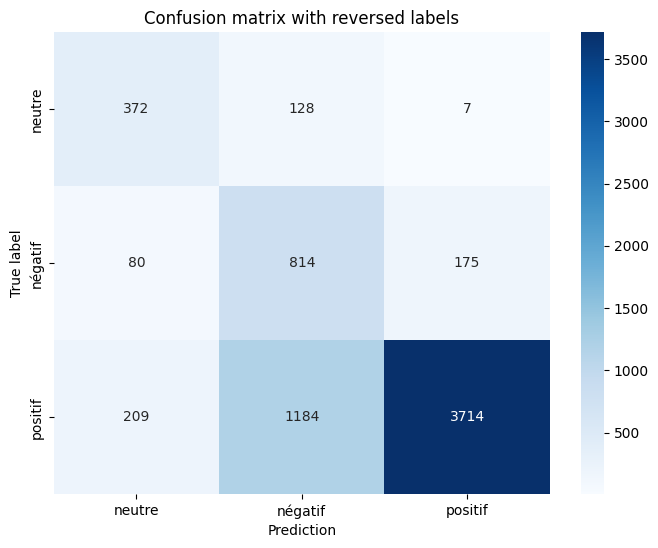

Classification report:
              precision    recall  f1-score   support

      neutre       0.56      0.73      0.64       507
     négatif       0.38      0.76      0.51      1069
     positif       0.95      0.73      0.83      5107

    accuracy                           0.73      6683
   macro avg       0.63      0.74      0.66      6683
weighted avg       0.83      0.73      0.76      6683



In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier  
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', GradientBoostingClassifier(random_state=42))  
])

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
   
    X = data['Commentaire']
    y = data[target_col]

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    if len(y_over) == 0:
        print("Error: Training set after over-sampling is empty.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }


    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)


    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    
    class_distribution_after_sampling = Counter(y_balanced)

    print("Class ratio after sampling:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)

 
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy on the test set:", accuracy)

 
    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())

    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title('Confusion matrix with reversed labels')
    plt.show()

    print("Classification report:")
    print(classification_report(y_test, y_pred))


imdb_comments = pd.read_csv('imdb_comments.csv')

# Experiment with different over-sampling and under-sampling rates
over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


### Gradient boosting with differents parameters

Class ratio after sampling:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy on the test set: 0.7659733652551249


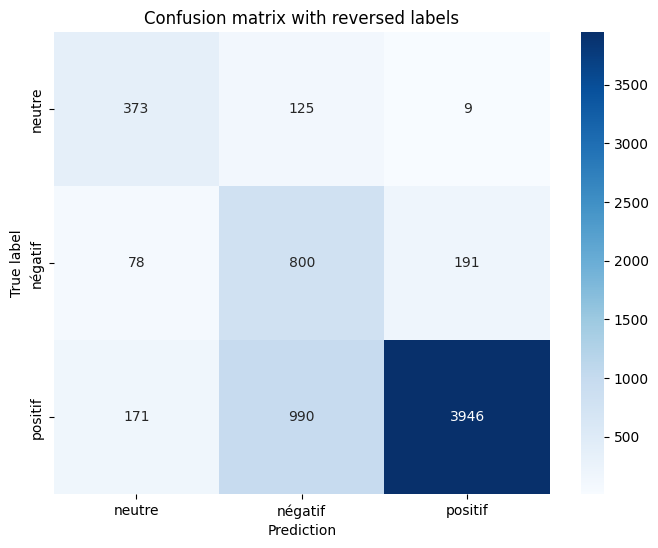

Classification report:
              precision    recall  f1-score   support

      neutre       0.60      0.74      0.66       507
     négatif       0.42      0.75      0.54      1069
     positif       0.95      0.77      0.85      5107

    accuracy                           0.77      6683
   macro avg       0.66      0.75      0.68      6683
weighted avg       0.84      0.77      0.79      6683



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', GradientBoostingClassifier(
        n_estimators=100,  # Number of boosting stages to be run
        learning_rate=0.1,  # Step size shrinkage used in the update to prevent overfitting
        max_depth=5,  # Maximum depth of the individual trees
        min_samples_split=2,  # The minimum number of samples required to split an internal node
        min_samples_leaf=1,  # The minimum number of samples required to be at a leaf node
        subsample=1.0,  # The fraction of samples used for fitting the individual base learners
        random_state=42
    ))
])


def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
  
    X = data['Commentaire']
    y = data[target_col]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

  
    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
    }

   
    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    if len(y_over) == 0:
        print("Error: Training set after over-sampling is empty.")
        return

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

 
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

  
    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)


    class_distribution_after_sampling = Counter(y_balanced)

    print("Class ratio after sampling:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

   
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    y_pred = pipeline.predict(X_test_tfidf)


    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy on the test set:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())

    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title('Confusion matrix with reversed labels')
    plt.show()

    # Display the classification report
    print("Classification report:")
    print(classification_report(y_test, y_pred))


imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


# Implementation models with Word2Vec

### SVM model(linear)


[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy sur l'ensemble de test: 0.6758940595540924


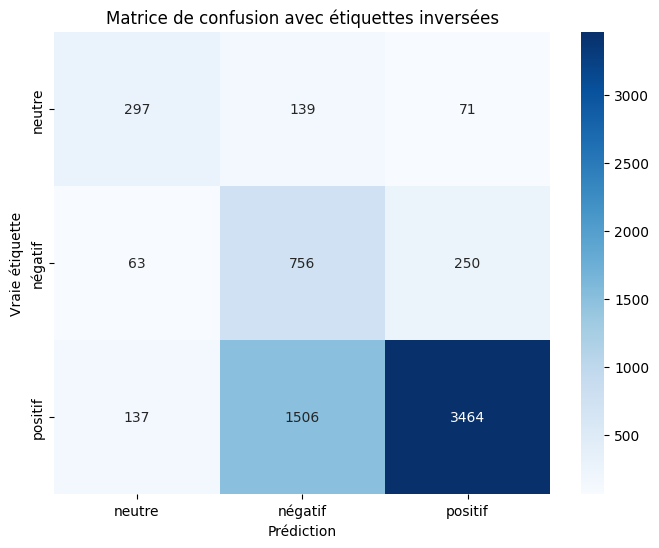

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.60      0.59      0.59       507
     négatif       0.31      0.71      0.44      1069
     positif       0.92      0.68      0.78      5107

    accuracy                           0.68      6683
   macro avg       0.61      0.66      0.60      6683
weighted avg       0.80      0.68      0.71      6683



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter

nltk.download('punkt')


def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]


svm_classifier = LinearSVC(random_state=42)

word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

pipeline = Pipeline([
    ('model', svm_classifier)
])


imdb_comments = pd.read_csv('imdb_comments.csv')

X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)

X_train_vectors = vectorize_comments(X_train_tokenized, vector_size=100)

# Définissez les taux de suréchantillonnage et de sous-échantillonnage
over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}


over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)

if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")
    pipeline.fit(X_balanced, y_balanced)

    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, vector_size=100)

    y_pred = pipeline.predict(X_test_vectors)

  
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)


    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())

    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    # Affichez le rapport de classification
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


### SVM (linear) and C=10.0

[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy sur l'ensemble de test: 0.6995361364656592


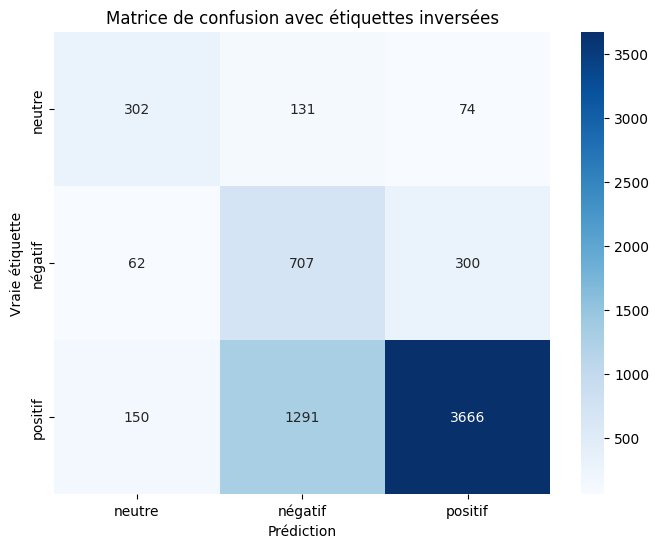

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.59      0.60      0.59       507
     négatif       0.33      0.66      0.44      1069
     positif       0.91      0.72      0.80      5107

    accuracy                           0.70      6683
   macro avg       0.61      0.66      0.61      6683
weighted avg       0.79      0.70      0.73      6683



In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np
from collections import Counter
import nltk

nltk.download('punkt')

def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]

def vectorize_comments(comments, model, vector_size):
    vectors = []
    for comment in comments:
        vector = np.zeros(vector_size)
        count = 0
        for word in comment:
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count != 0:
            vector /= count
        vectors.append(vector)
    return np.array(vectors)


svm_classifier = LinearSVC(C=10.0, random_state=42)


word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

pipeline = Pipeline([
    ('model', svm_classifier)
])

imdb_comments = pd.read_csv('imdb_comments.csv')

X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)

X_train_vectors = vectorize_comments(X_train_tokenized, word2vec_model, vector_size=100)


over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}


over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)

if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

 
    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")


    pipeline.fit(X_balanced, y_balanced)


    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, word2vec_model, vector_size=100)

    y_pred = pipeline.predict(X_test_vectors)


    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    
    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())


    labels_reversed = list(reversed(labels))

    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    # Affichez le rapport de classification
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


### SVM with 'rbf' and C=10.0

[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.7092623073469998


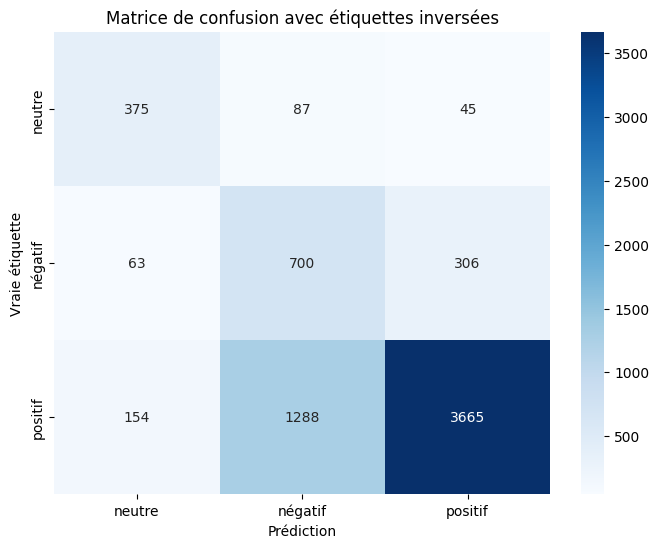

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.63      0.74      0.68       507
     négatif       0.34      0.65      0.45      1069
     positif       0.91      0.72      0.80      5107

    accuracy                           0.71      6683
   macro avg       0.63      0.70      0.64      6683
weighted avg       0.80      0.71      0.74      6683



In [14]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import nltk

#
nltk.download('punkt')


def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]

def vectorize_comments(comments, model, vector_size):
    vectors = []
    for comment in comments:
        vector = np.zeros(vector_size)
        count = 0
        for word in comment:
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count != 0:
            vector /= count
        vectors.append(vector)
    return np.array(vectors)

svm_classifier = SVC(kernel='rbf', C=10.0, random_state=42)

word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

pipeline = Pipeline([
    ('model', svm_classifier)
])


imdb_comments = pd.read_csv('imdb_comments.csv')

X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)


X_train_vectors = vectorize_comments(X_train_tokenized, word2vec_model, vector_size=100)

over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}


over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)

if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    # Affichez le ratio des classes après l'échantillonnage
    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)


    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, word2vec_model, vector_size=100)

    y_pred = pipeline.predict(X_test_vectors)


    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)


    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())


    labels_reversed = list(reversed(labels))


    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    # Affichez le rapport de classification
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

### simple logistic regression

[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy sur l'ensemble de test: 0.6860691306299566


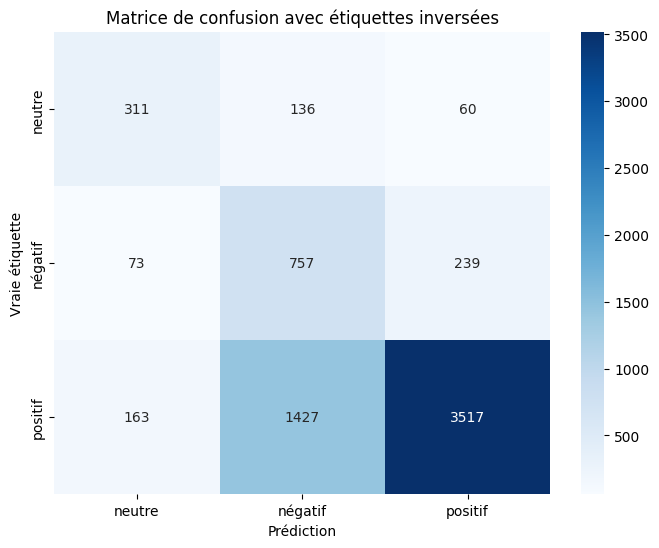

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.57      0.61      0.59       507
     négatif       0.33      0.71      0.45      1069
     positif       0.92      0.69      0.79      5107

    accuracy                           0.69      6683
   macro avg       0.61      0.67      0.61      6683
weighted avg       0.80      0.69      0.72      6683



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import nltk

nltk.download('punkt')


def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]

def vectorize_comments(comments, model, vector_size):
    vectors = []
    for comment in comments:
        vector = np.zeros(vector_size)
        count = 0
        for word in comment:
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count != 0:
            vector /= count
        vectors.append(vector)
    return np.array(vectors)


logistic_classifier = LogisticRegression(C=10.0, random_state=42)


word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

pipeline = Pipeline([
    ('model', logistic_classifier)
])


imdb_comments = pd.read_csv('imdb_comments.csv')


X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)


X_train_vectors = vectorize_comments(X_train_tokenized, word2vec_model, vector_size=100)

over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}


over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)

if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)


    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

 
    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, word2vec_model, vector_size=100)

    y_pred = pipeline.predict(X_test_vectors)

 
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())

    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    # Affichez le rapport de classification
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


### logisztic with C=10.0 and penality='l2'

[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy sur l'ensemble de test: 0.6823282956755948


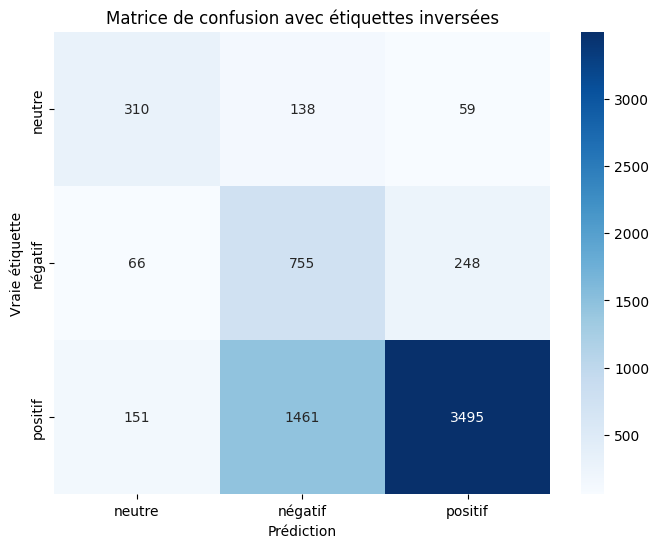

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.59      0.61      0.60       507
     négatif       0.32      0.71      0.44      1069
     positif       0.92      0.68      0.78      5107

    accuracy                           0.68      6683
   macro avg       0.61      0.67      0.61      6683
weighted avg       0.80      0.68      0.72      6683



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import nltk


nltk.download('punkt')

def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]

def vectorize_comments(comments, model, vector_size):
    vectors = []
    for comment in comments:
        vector = np.zeros(vector_size)
        count = 0
        for word in comment:
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count != 0:
            vector /= count
        vectors.append(vector)
    return np.array(vectors)

logistic_classifier = LogisticRegression(C=10.0, penalty='l2', random_state=42)


pipeline = Pipeline([
    ('model', logistic_classifier)
])

imdb_comments = pd.read_csv('imdb_comments.csv')

X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)

X_train_vectors = vectorize_comments(X_train_tokenized, word2vec_model, vector_size=100)


over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}


over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)

if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

 
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, word2vec_model, vector_size=100)

    y_pred = pipeline.predict(X_test_vectors)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())


    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

   
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


### Logistic with solver ='lbfgs'

[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy sur l'ensemble de test: 0.6800837947029778


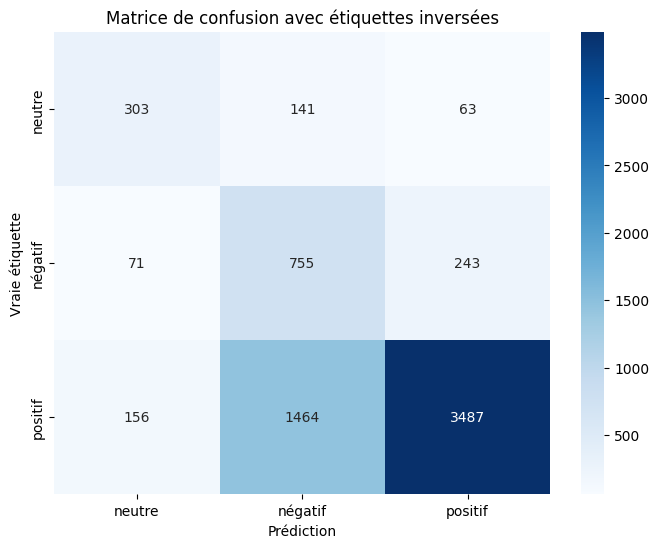

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.57      0.60      0.58       507
     négatif       0.32      0.71      0.44      1069
     positif       0.92      0.68      0.78      5107

    accuracy                           0.68      6683
   macro avg       0.60      0.66      0.60      6683
weighted avg       0.80      0.68      0.71      6683



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import nltk

nltk.download('punkt')


def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]

# vectoriser les commentaires avec Word2Vec
def vectorize_comments(comments, model, vector_size):
    vectors = []
    for comment in comments:
        vector = np.zeros(vector_size)
        count = 0
        for word in comment:
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count != 0:
            vector /= count
        vectors.append(vector)
    return np.array(vectors)

logistic_classifier = LogisticRegression(C=10.0, penalty='l2', solver='lbfgs', random_state=42)


word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)


pipeline = Pipeline([
    ('model', logistic_classifier)
])


imdb_comments = pd.read_csv('imdb_comments.csv')


X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)

X_train_vectors = vectorize_comments(X_train_tokenized, word2vec_model, vector_size=100)

over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}


over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)

if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")


    pipeline.fit(X_balanced, y_balanced)


    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, word2vec_model, vector_size=100)


    y_pred = pipeline.predict(X_test_vectors)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())

    labels_reversed = list(reversed(labels))

 
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

  
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


### Logistic with solver ='sag'

[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925


C:\Users\Salma Fannich\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy sur l'ensemble de test: 0.6797845279066288


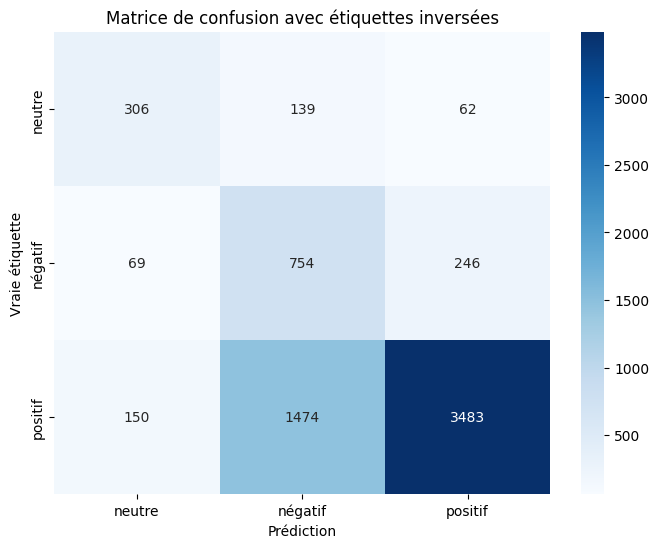

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.58      0.60      0.59       507
     négatif       0.32      0.71      0.44      1069
     positif       0.92      0.68      0.78      5107

    accuracy                           0.68      6683
   macro avg       0.61      0.66      0.60      6683
weighted avg       0.80      0.68      0.71      6683



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import nltk


nltk.download('punkt')

def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]

def vectorize_comments(comments, model, vector_size):
    vectors = []
    for comment in comments:
        vector = np.zeros(vector_size)
        count = 0
        for word in comment:
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count != 0:
            vector /= count
        vectors.append(vector)
    return np.array(vectors)


logistic_classifier = LogisticRegression(C=10.0, penalty='l2', solver='sag', random_state=42)

word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

pipeline = Pipeline([
    ('model', logistic_classifier)
])


imdb_comments = pd.read_csv('imdb_comments.csv')

X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)

X_train_vectors = vectorize_comments(X_train_tokenized, word2vec_model, vector_size=100)

over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}

over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)

if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }


    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)

    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, word2vec_model, vector_size=100)

    y_pred = pipeline.predict(X_test_vectors)


    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())

   
    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


### Word2Vec with random forest

[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.7824330390543169


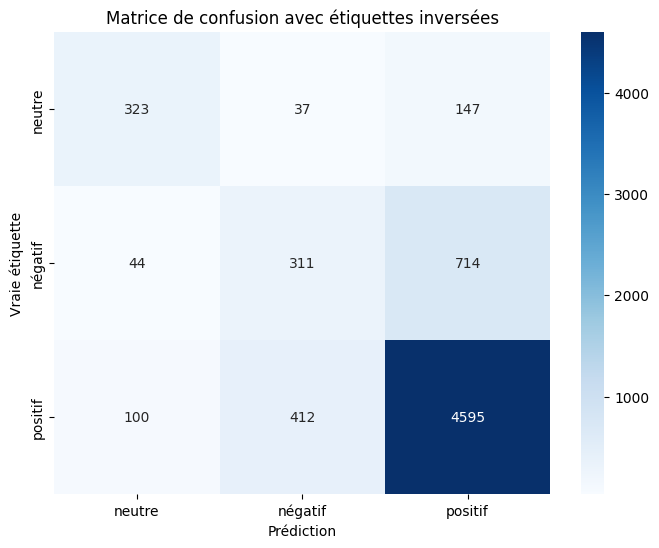

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.69      0.64      0.66       507
     négatif       0.41      0.29      0.34      1069
     positif       0.84      0.90      0.87      5107

    accuracy                           0.78      6683
   macro avg       0.65      0.61      0.62      6683
weighted avg       0.76      0.78      0.77      6683



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
nltk.download('punkt')

def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]

rf_classifier = RandomForestClassifier(random_state=42)


word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

pipeline = Pipeline([
    ('model', rf_classifier)
])

imdb_comments = pd.read_csv('imdb_comments.csv')

X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)

def vectorize_comments(tokens, vector_size):
    vectors = []
    for token_list in tokens:
 
        valid_tokens = [token for token in token_list if token in word2vec_model.wv]
        if valid_tokens:
            vectors.append(np.mean([word2vec_model.wv[token] for token in valid_tokens], axis=0))
        else:
          
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)



X_train_vectors = vectorize_comments(X_train_tokenized, vector_size=100)

over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}


over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)

if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")


    pipeline.fit(X_balanced, y_balanced)

    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, vector_size=100)

    y_pred = pipeline.predict(X_test_vectors)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)


    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())

  
    labels_reversed = list(reversed(labels))


    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


 ### Random forest with max_depth:None and n_estimators 200

[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.787819841388598


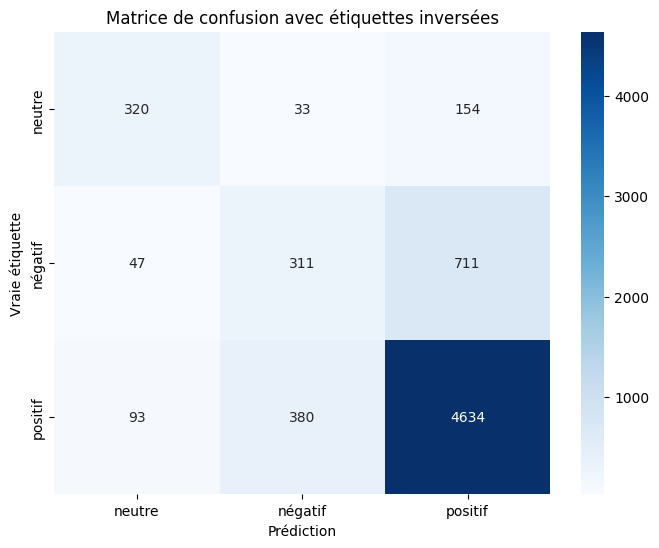

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.70      0.63      0.66       507
     négatif       0.43      0.29      0.35      1069
     positif       0.84      0.91      0.87      5107

    accuracy                           0.79      6683
   macro avg       0.66      0.61      0.63      6683
weighted avg       0.77      0.79      0.77      6683



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import nltk


nltk.download('punkt')

def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]

rf_classifier = RandomForestClassifier(random_state=42, max_depth=None, n_estimators=200)

word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

pipeline = Pipeline([
    ('model', rf_classifier)
])


imdb_comments = pd.read_csv('imdb_comments.csv')

X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)

def vectorize_comments(tokens, vector_size):
    vectors = []
    for token_list in tokens:
 
        valid_tokens = [token for token in token_list if token in word2vec_model.wv]
        if valid_tokens:
            vectors.append(np.mean([word2vec_model.wv[token] for token in valid_tokens], axis=0))
        else:
           
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)


X_train_vectors = vectorize_comments(X_train_tokenized, vector_size=100)

over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}


over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)


if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }


    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    pipeline.fit(X_balanced, y_balanced)


    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, vector_size=100)

    y_pred = pipeline.predict(X_test_vectors)


    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)


    confusion = confusion_matrix(y_test, y_pred)

    labels = list(y.unique())

    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


### Gradient Boosting Model

[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.6971420020948675


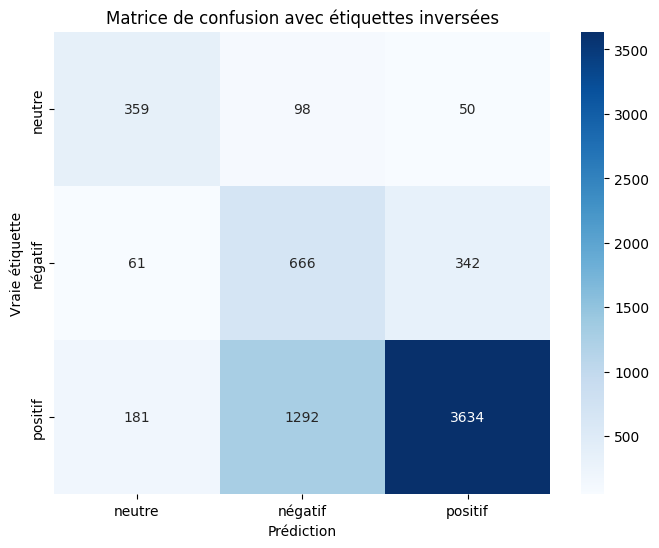

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.60      0.71      0.65       507
     négatif       0.32      0.62      0.43      1069
     positif       0.90      0.71      0.80      5107

    accuracy                           0.70      6683
   macro avg       0.61      0.68      0.62      6683
weighted avg       0.79      0.70      0.73      6683



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import nltk

nltk.download('punkt')

def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]

def vectorize_comments(comments, model, vector_size):
    vectors = []
    for comment in comments:
        vector = np.zeros(vector_size)
        count = 0
        for word in comment:
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count != 0:
            vector /= count
        vectors.append(vector)
    return np.array(vectors)


gb_classifier = GradientBoostingClassifier(random_state=42)


word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

pipeline = Pipeline([
    ('model', gb_classifier)
])


imdb_comments = pd.read_csv('imdb_comments.csv')

X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)

X_train_vectors = vectorize_comments(X_train_tokenized, word2vec_model, vector_size=100)


over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}

over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)

if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }


    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)


    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    # Comptez le nombre d'occurrences de chaque classe dans l'ensemble de données équilibré
    class_distribution_after_sampling = Counter(y_balanced)

    # Affichez le ratio des classes après l'échantillonnage
    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")


    pipeline.fit(X_balanced, y_balanced)

    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, word2vec_model, vector_size=100)
    # Prédisez les étiquettes sur l'ensemble de test
    y_pred = pipeline.predict(X_test_vectors)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)


    confusion = confusion_matrix(y_test, y_pred)

    # Étiquettes possibles
    labels = list(y.unique())

    labels_reversed = list(reversed(labels))

    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

 
    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


### Gradient Boosting avec N_estimators:100,Learning_rate:0.1,Max_depth=5,Min_sample_split:2,Min_sample_leaf:1,Subsample:1

[nltk_data] Downloading package punkt to C:\Users\Salma
[nltk_data]     Fannich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.732754750860392


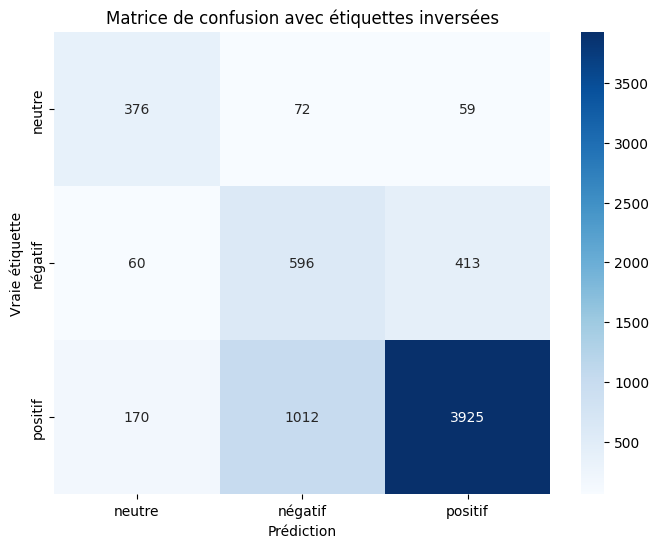

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.62      0.74      0.68       507
     négatif       0.35      0.56      0.43      1069
     positif       0.89      0.77      0.83      5107

    accuracy                           0.73      6683
   macro avg       0.62      0.69      0.65      6683
weighted avg       0.79      0.73      0.75      6683



In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import nltk


nltk.download('punkt')


def tokenize_comments(comments):
    return [word_tokenize(comment) for comment in comments]

def vectorize_comments(comments, model, vector_size):
    vectors = []
    for comment in comments:
        vector = np.zeros(vector_size)
        count = 0
        for word in comment:
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count != 0:
            vector /= count
        vectors.append(vector)
    return np.array(vectors)

gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1,
    random_state=42
)


word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)


pipeline = Pipeline([
    ('model', gb_classifier)
])

imdb_comments = pd.read_csv('imdb_comments.csv')

X = imdb_comments['Commentaire']
y = imdb_comments['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tokenized = tokenize_comments(X_train)
word2vec_model.build_vocab(X_train_tokenized)
word2vec_model.train(X_train_tokenized, total_examples=word2vec_model.corpus_count, epochs=10)

X_train_vectors = vectorize_comments(X_train_tokenized, word2vec_model, vector_size=100)


over_sampling_rate = 2.5
under_sampling_rate = 0.5

sampling_strategy_over = {
    'positif': int(len(y_train[y_train == 'positif'])),
    'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
    'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre']))
}

over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)


X_over, y_over = over_sampler.fit_resample(X_train_vectors, y_train)
 
if len(y_over) == 0:
    print("Erreur: Ensemble d'entraînement après suréchantillonnage vide.")
else:
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over == 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }

    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")
    pipeline.fit(X_balanced, y_balanced)

    X_test_tokenized = tokenize_comments(X_test)
    X_test_vectors = vectorize_comments(X_test_tokenized, word2vec_model, vector_size=100)

    y_pred = pipeline.predict(X_test_vectors)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)


    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())

    labels_reversed = list(reversed(labels))

    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()


    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))


## Save the final model in pickle file (model fo SVM with C=10 and 'rbf' 

Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
Accuracy sur l'ensemble de test: 0.8701182103845578


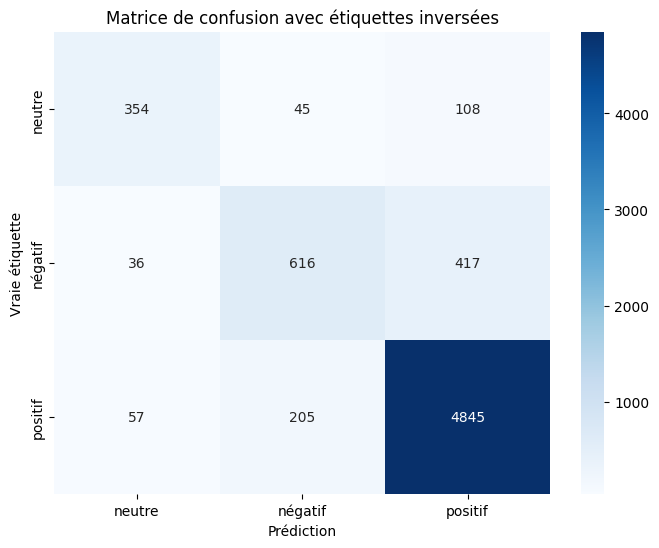

Rapport de classification:
              precision    recall  f1-score   support

      neutre       0.79      0.70      0.74       507
     négatif       0.71      0.58      0.64      1069
     positif       0.90      0.95      0.92      5107

    accuracy                           0.87      6683
   macro avg       0.80      0.74      0.77      6683
weighted avg       0.86      0.87      0.86      6683

Model saved to 'sentiment_model.pkl'


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC  
from collections import Counter
import pickle

tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('model', SVC(kernel='rbf',C=10.0, random_state=42)) 
])


def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
  
    X = data['Commentaire']
    y = data[target_col]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Ajustez le vectoriseur sur les données d'entraînement et transformez-les
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)



    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }


    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)

    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }
    
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)


    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    # Entraînez le modèle sur l'ensemble d'entraînement prétraité
    pipeline.fit(X_balanced, y_balanced)

   
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

   
    y_pred = pipeline.predict(X_test_tfidf)

  
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur l'ensemble de test:", accuracy)

    confusion = confusion_matrix(y_test, y_pred)


    labels = list(y.unique())
    

    labels_reversed = list(reversed(labels))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reversed, yticklabels=labels_reversed)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.title('Matrice de confusion avec étiquettes inversées')
    plt.show()

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

    with open('sentiment_model.pkl', 'wb') as model_file:
        pickle.dump(pipeline, model_file)
    print("Model saved to 'sentiment_model.pkl'")


imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pickle

tfidf_vectorizer = TfidfVectorizer()

def train_and_evaluate_model(data, target_col, over_sampling_rate, under_sampling_rate):
   
    X = data['Commentaire']
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)


    sampling_strategy_over = {
        'positif': int(len(y_train[y_train == 'positif'])),
        'négatif': int(over_sampling_rate * len(y_train[y_train == 'négatif'])),
        'neutre': int(over_sampling_rate * len(y_train[y_train == 'neutre'])) 
    }

    over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)

    X_over, y_over = over_sampler.fit_resample(X_train_tfidf, y_train)
    
    sampling_strategy_under = {
        'positif': int(under_sampling_rate * len(y_over[y_over== 'positif'])),
        'négatif': int(len(y_over[y_over == 'négatif'])),
        'neutre': int(len(y_over[y_over == 'neutre']))
    }
    
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)
    X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)

    class_distribution_after_sampling = Counter(y_balanced)

    print("Ratio des classes après échantillonnage:")
    for label, count in class_distribution_after_sampling.items():
        print(f"{label}: {count}")

    with open('tfidfvectorizer.pkl', 'wb') as tfidf_model_file:
        pickle.dump(tfidf_vectorizer, tfidf_model_file)
    print("TfidfVectorizer model saved to 'tfidfvectorizer.pkl'")

imdb_comments = pd.read_csv('imdb_comments.csv')

over_sampling_rate = 2.5
under_sampling_rate = 0.5
train_and_evaluate_model(imdb_comments, 'sentiment', over_sampling_rate, under_sampling_rate)


Ratio des classes après échantillonnage:
neutre: 3255
négatif: 6102
positif: 5925
TfidfVectorizer model saved to 'tfidfvectorizer.pkl'


### charger le fichier pickle 

In [6]:
import pickle

with open('sentiment_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

### predict sentiment by pickle file

In [7]:
import pickle

with open('sentiment_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

print(loaded_model.named_steps.keys())


dict_keys(['model'])


In [8]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


with open('sentiment_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

imdb_comments = pd.read_csv('imdb_comments.csv')


new_comments = [
    "I loved this movie, it was fantastic!",
    "Terrible film, I hated every moment of it.",
    "Neutral opinion on the movie."
]

new_comments_tfidf = tfidf_vectorizer.transform(new_comments)

predicted_sentiments = loaded_model.predict(new_comments_tfidf)

for comment, sentiment in zip(new_comments, predicted_sentiments):
    print(f"Commentaire : '{comment}' => Prédiction de sentiment : {'Positive' if sentiment == 'positif' else 'Negative' if sentiment == 'négatif' else 'Neutral'}")


Commentaire : 'I loved this movie, it was fantastic!' => Prédiction de sentiment : Positive
Commentaire : 'Terrible film, I hated every moment of it.' => Prédiction de sentiment : Negative
Commentaire : 'Neutral opinion on the movie.' => Prédiction de sentiment : Neutral


In [1]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

with open('sentiment_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('tfidfvectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

imdb_comments = pd.read_csv('imdb_comments.csv')

new_comments = [
    "I loved this movie, it was fantastic!",
    "Terrible film, I hated every moment of it.",
    "Neutral opinion on the movie."
]


new_comments_tfidf = loaded_vectorizer.transform(new_comments)


predicted_sentiments = loaded_model.predict(new_comments_tfidf)

for comment, sentiment in zip(new_comments, predicted_sentiments):
    print(f"Commentaire : '{comment}' => Prédiction de sentiment : {'Positive' if sentiment == 'positif' else 'Negative' if sentiment == 'négatif' else 'Neutral'}")


Commentaire : 'I loved this movie, it was fantastic!' => Prédiction de sentiment : Positive
Commentaire : 'Terrible film, I hated every moment of it.' => Prédiction de sentiment : Negative
Commentaire : 'Neutral opinion on the movie.' => Prédiction de sentiment : Neutral
